# Introduction:
This project compares the two cities of London and Berlin. Both cities are very diverse and are the capitals of their respective countries. We are comparing the neighbourhoods of the two cities and determine how similar or dissimilar they are, taking crime statistics, population numbers and geographical location of police stations into account.

# Data Section:

The data used for this project:

London:
[1]:  "Crime rates in London over24 months"
[2]:  "London Boroughs & Popuation Wikipedia"
[3]: "Foursquare London Location data for Police Stations"

Berlin:
[1]: "Crime Rates in Berlin over 12 months"
[2]:  "Berlin Boroughs & Popuation Wikipedia"
[3]: "Foursquare Berlin Location data for Police Stations"



In [35]:
import pandas as pd
import numpy as np

In [36]:
# Read crime records data
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201901,201902,201903,201904,201905,201906,201907,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,2,5,5,11,3,5,...,6,2,2,4,4,6,2,7,4,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,97,127,138,130,140,113,134,...,107,80,86,121,122,114,116,119,100,108
2,Burglary,Burglary - Business and Community,Barking and Dagenham,45,24,29,27,21,27,31,...,28,29,16,16,28,24,32,21,19,24
3,Burglary,Burglary - Residential,Barking and Dagenham,114,107,99,96,114,96,71,...,97,57,42,63,72,63,54,68,90,91
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,2,6,5,9,6,11,...,6,15,15,12,21,9,11,14,17,14


In [37]:
# Dimension of Data
crime.shape

(1556, 27)

In [38]:
# Names of Boroughs
crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [39]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201901,201902,201903,201904,201905,201906,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Arson and Criminal Damage,Arson,Barking and Dagenham,116,5,2,5,5,11,3,...,6,2,2,4,4,6,2,7,4,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2707,97,127,138,130,140,113,...,107,80,86,121,122,114,116,119,100,108
2,Burglary,Burglary - Business and Community,Barking and Dagenham,647,45,24,29,27,21,27,...,28,29,16,16,28,24,32,21,19,24
3,Burglary,Burglary - Residential,Barking and Dagenham,2121,114,107,99,96,114,96,...,97,57,42,63,72,63,54,68,90,91
4,Drug Offences,Drug Trafficking,Barking and Dagenham,241,6,2,6,5,9,6,...,6,15,15,12,21,9,11,14,17,14


In [42]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime.head()

,LookUp_BoroughName,MonthlyAverage,201901,201902,201903,201904,201905,201906,201907,201908,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Barking and Dagenham,1641.958333,1582,1576,1713,1681,1823,1687,1823,1549,...,1799,1272,1451,1628,1678,1629,1605,1693,1718,1487
1,Barnet,2454.875000,2412,2545,2844,2552,2563,2736,2830,2423,...,2299,1662,1985,2094,2379,2378,2307,2457,2386,2145
2,Bexley,1401.541667,1543,1349,1437,1488,1606,1475,1536,1533,...,1284,911,1224,1188,1333,1434,1301,1299,1332,1171
3,Brent,2463.458333,2492,2372,2671,2447,2574,2581,2680,2474,...,2273,2033,2253,2407,2598,2594,2474,2603,2297,2224
4,Bromley,1965.708333,2000,1956,2109,1968,2115,2015,2201,2106,...,1767,1443,1645,1694,1920,1784,1906,2064,1857,1665


In [41]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,LookUp_BoroughName,MonthlyAverage,201901,201902,201903,201904,201905,201906,201907,201908,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Barking and Dagenham,1641.958333,1582,1576,1713,1681,1823,1687,1823,1549,...,1799,1272,1451,1628,1678,1629,1605,1693,1718,1487
1,Barnet,2454.875000,2412,2545,2844,2552,2563,2736,2830,2423,...,2299,1662,1985,2094,2379,2378,2307,2457,2386,2145
2,Bexley,1401.541667,1543,1349,1437,1488,1606,1475,1536,1533,...,1284,911,1224,1188,1333,1434,1301,1299,1332,1171
3,Brent,2463.458333,2492,2372,2671,2447,2574,2581,2680,2474,...,2273,2033,2253,2407,2598,2594,2474,2603,2297,2224
4,Bromley,1965.708333,2000,1956,2109,1968,2115,2015,2201,2106,...,1767,1443,1645,1694,1920,1784,1906,2064,1857,1665


In [19]:
# Explore the clean dataset - borough with least incidents
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,LookUp_BoroughName,MonthlyAverage,201901,201902,201903,201904,201905,201906,201907,201908,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
22,London Heathrow and London City Airports,214.625000,248,267,295,260,270,328,345,320,...,266,53,37,52,65,64,115,122,89,136
19,Kingston upon Thames,1024.000000,1051,1033,1150,1147,1126,1092,1199,1082,...,912,684,816,937,1065,1014,1018,956,919,849
26,Richmond upon Thames,1048.916667,1040,976,1125,1095,1085,1075,1083,1021,...,933,718,970,1017,1195,1169,1109,1061,996,900
28,Sutton,1123.916667,1121,1138,1135,1167,1248,1117,1145,1227,...,1189,867,1015,1104,1048,1031,1020,1089,1172,920
23,Merton,1168.208333,1220,1053,1248,1210,1119,1163,1349,1277,...,1135,890,997,1106,1271,1208,1245,1204,1098,966


In [44]:
### Explore the clean dataset - borough with most incidents
crime.rename(columns = {'LookUp_BoroughName':'BoroughName'}, inplace = True) 
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage,201901,201902,201903,201904,201905,201906,201907,201908,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
32,Westminster,5485.500000,6280,6509,7220,7225,6852,6925,6991,7085,...,4695,1706,2261,2989,4100,4486,4469,4332,3007,3509
27,Southwark,3010.333333,3064,3013,3516,3259,3439,3342,3534,3358,...,2447,1842,2229,2544,2989,3154,2993,2977,2607,2378
24,Newham,2897.708333,2831,2890,3036,2914,3102,3159,3342,2984,...,2593,2071,2329,2692,2984,2981,2893,3092,2785,2877
5,Camden,2890.166667,3061,3174,3459,3235,3293,3163,3458,3210,...,2717,1636,1863,2082,2434,2578,2602,2717,2258,1970
20,Lambeth,2799.458333,2782,2771,3180,2929,3075,3080,3280,3134,...,2512,1889,2267,2493,2890,2961,2875,2689,2535,2192


In [21]:
import matplotlib.pyplot as plt

# Visualising the crime data in London by Bourogh

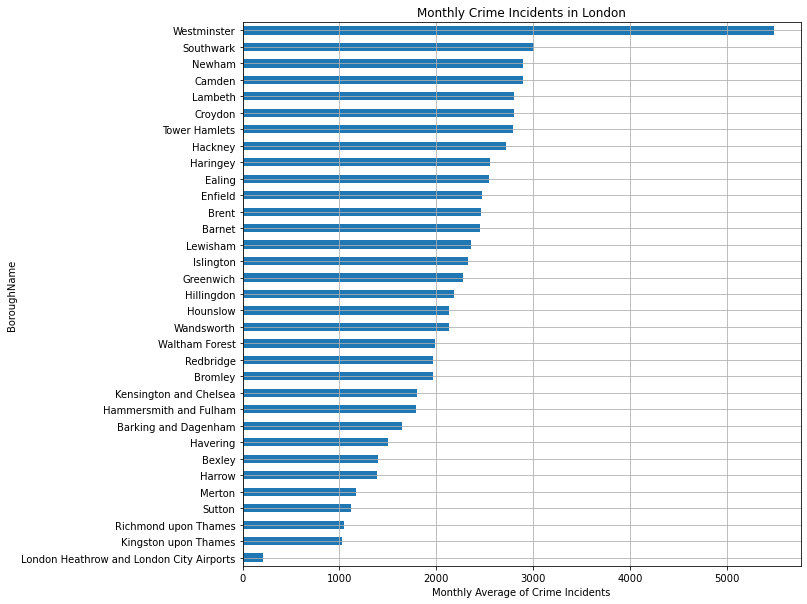

In [22]:

crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

<bound method Grid.set of <seaborn.axisgrid.FacetGrid object at 0x7f23b48cfd50>>

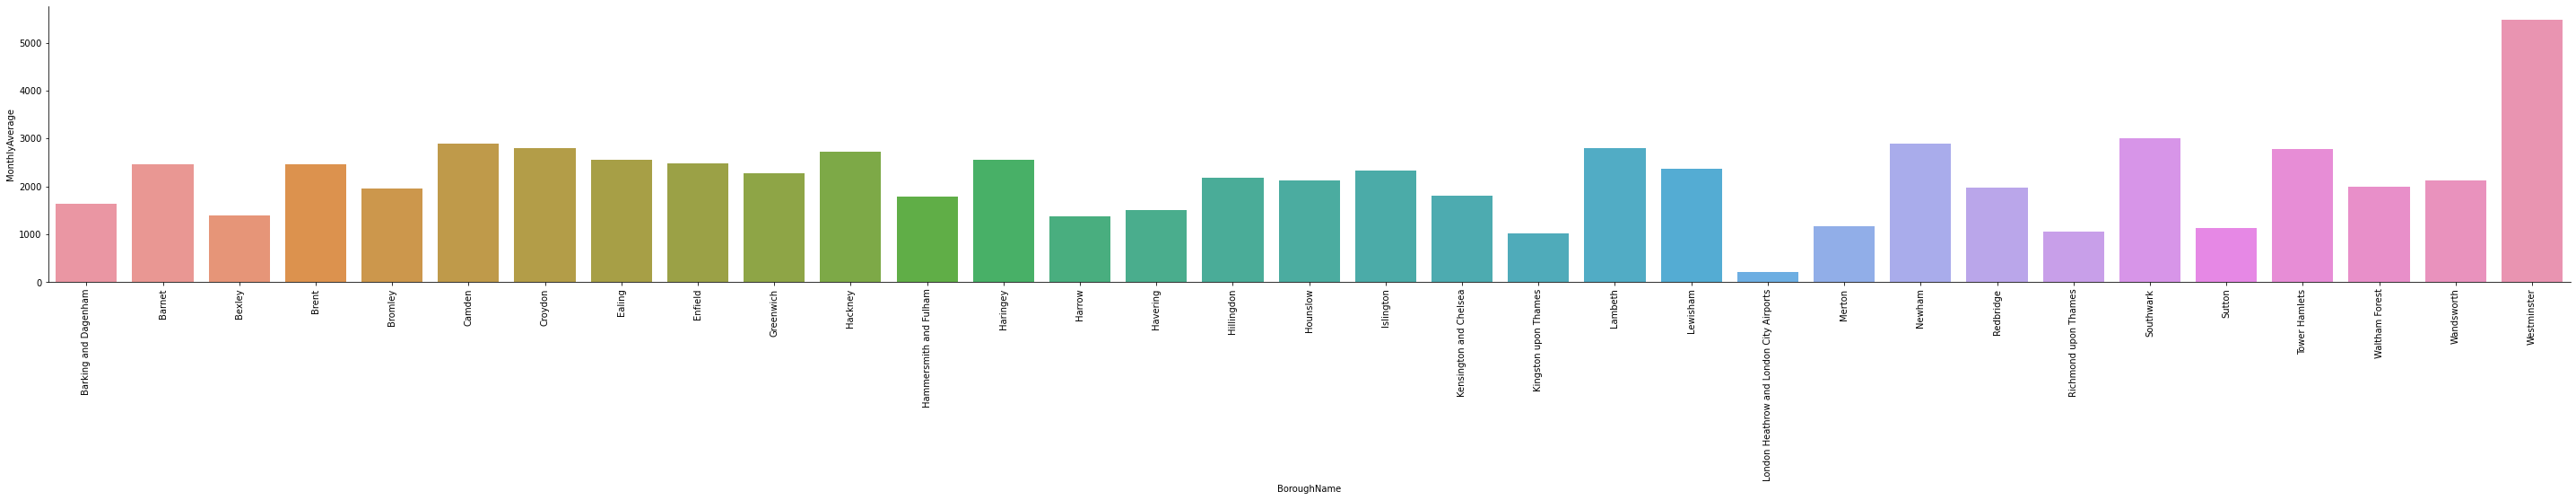

In [23]:
import seaborn as sns
crime = sns.catplot(data = crime, x='BoroughName', y='MonthlyAverage', kind='bar', aspect=8)
crime.set_xticklabels(rotation=90)
crime.set

#Explore population density in London, UK

In [120]:
import requests
import lxml
from bs4 import BeautifulSoup

In [121]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBWNopLlt4I2I9ropyro5gAAAIU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":997329509,"wgRevisionId":997329509,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists",

In [122]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n',))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [27]:

dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
London_Population = pd.DataFrame.from_dict(dict)
London_Population.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"212,906",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"395,896",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"248,287",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"329,771",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"332,336",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [28]:
London_Population[['Coordinates1','Coordinates2','Coordinates3']] = London_Population['Coordinates'].str.split('/',expand=True)
London_Population.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham [note 1],"212,906",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"395,896",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"248,287",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"329,771",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"332,336",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [29]:
London_Population.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
London_Population[['Latitude','Longitude']] = London_Population['Coordinates3'].str.split(';',expand=True)
London_Population.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham [note 1],"212,906",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"395,896",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"248,287",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"329,771",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"332,336",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [30]:
London_Population.drop(labels=['Coordinates3'], axis=1,inplace = True)
London_Population['Latitude'] = London_Population['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
London_Population['Latitude'] = London_Population['Latitude'].map(lambda x: x.lstrip())
London_Population['Longitude'] = London_Population['Longitude'].map(lambda x: x.rstrip(')'))
London_Population['Longitude'] = London_Population['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'))
London_Population['Longitude'] = London_Population['Longitude'].map(lambda x: x.rstrip(' ('))
London_Population['Longitude'] = London_Population['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
London_Population['Longitude'] = London_Population['Longitude'].map(lambda x: x.lstrip())
London_Population['Population'] = London_Population['Population'].str.replace(',','')
London_Population.drop([0], inplace=True)
London_Population.drop([12], inplace=True)
London_Population.head()

,BoroughName,Population,Latitude,Longitude
1,Barnet,395896,51.6252,-0.1517
2,Bexley,248287,51.4549,0.1505
3,Brent,329771,51.5588,-0.2817
4,Bromley,332336,51.4039,0.0198
5,Camden,270029,51.5290,-0.1255


#visualise London Population density by borough

In [31]:
London_Population.sort_values(by='Population', ascending=False).head()

,BoroughName,Population,Latitude,Longitude
1,Barnet,395896,51.6252,-0.1517
6,Croydon,386710,51.3714,-0.0977
23,Newham,353134,51.5077,0.0469
7,Ealing,341806,51.5130,-0.3089
8,Enfield,333794,51.6538,-0.0799


In [47]:
London = pd.merge(London_Population,crime, how='left', left_on = 'BoroughName', right_on = 'BoroughName')

London.head()

,BoroughName,Population,Latitude,Longitude,MonthlyAverage,201901,201902,201903,201904,201905,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Barnet,395896,51.6252,-0.1517,2454.875000,2412.0,2545.0,2844.0,2552.0,2563.0,...,2299.0,1662.0,1985.0,2094.0,2379.0,2378.0,2307.0,2457.0,2386.0,2145.0
1,Bexley,248287,51.4549,0.1505,1401.541667,1543.0,1349.0,1437.0,1488.0,1606.0,...,1284.0,911.0,1224.0,1188.0,1333.0,1434.0,1301.0,1299.0,1332.0,1171.0
2,Brent,329771,51.5588,-0.2817,2463.458333,2492.0,2372.0,2671.0,2447.0,2574.0,...,2273.0,2033.0,2253.0,2407.0,2598.0,2594.0,2474.0,2603.0,2297.0,2224.0
3,Bromley,332336,51.4039,0.0198,1965.708333,2000.0,1956.0,2109.0,1968.0,2115.0,...,1767.0,1443.0,1645.0,1694.0,1920.0,1784.0,1906.0,2064.0,1857.0,1665.0
4,Camden,270029,51.5290,-0.1255,2890.166667,3061.0,3174.0,3459.0,3235.0,3293.0,...,2717.0,1636.0,1863.0,2082.0,2434.0,2578.0,2602.0,2717.0,2258.0,1970.0


In [48]:
London.shape

(30, 29)

In [55]:
London['BoroughName'].unique()

array(['Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon',
       'Ealing', 'Enfield', 'Greenwich [note 2]', 'Hackney',
       'Hammersmith and Fulham [note 4]', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

# Create Heatmap comparing Popultion density and monthly crimerate

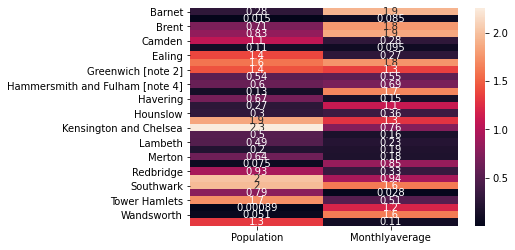

In [172]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden','Croydon','Ealing', 'Enfield', 'Greenwich [note 2]', 'Hackney','Hammersmith and Fulham [note 4]', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea','Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']
Cols = ['Population', 'Monthlyaverage']
df = DataFrame(abs(np.random.randn(30, 2)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

#Install Folium to map location

In [58]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

!pip install folium
import folium

print('Folium installed and imported!')


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

     |████████████████████████████████| 94 kB 5.4 MB/s  eta 0:00:01
Folium installed and imported!


Folium Map London

In [139]:
address = "London, England, ON"

geolocator = Nominatim(user_agent="london_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London city are 51.499510900000004, -0.156638578846158.


In [140]:
# create map of London using latitude and longitude values
map_London = folium.Map(location=[latitude, longitude], zoom_start=10)
map_London

In [141]:
London.sort_values(by='Population', ascending=False).head()

,BoroughName,Population,Latitude,Longitude,MonthlyAverage,201901,201902,201903,201904,201905,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
0,Barnet,395896,51.6252,-0.1517,2454.875000,2412.0,2545.0,2844.0,2552.0,2563.0,...,2299.0,1662.0,1985.0,2094.0,2379.0,2378.0,2307.0,2457.0,2386.0,2145.0
5,Croydon,386710,51.3714,-0.0977,2797.208333,2642.0,2572.0,2834.0,2620.0,2800.0,...,2991.0,2248.0,2505.0,2726.0,3095.0,2925.0,2793.0,2914.0,2635.0,2460.0
21,Newham,353134,51.5077,0.0469,2897.708333,2831.0,2890.0,3036.0,2914.0,3102.0,...,2593.0,2071.0,2329.0,2692.0,2984.0,2981.0,2893.0,3092.0,2785.0,2877.0
6,Ealing,341806,51.5130,-0.3089,2547.750000,2550.0,2464.0,2915.0,2508.0,2611.0,...,2366.0,1991.0,2281.0,2324.0,2569.0,2572.0,2690.0,2753.0,2466.0,2171.0
7,Enfield,333794,51.6538,-0.0799,2471.916667,2509.0,2346.0,2604.0,2413.0,2454.0,...,2367.0,1860.0,2206.0,2345.0,2506.0,2361.0,2627.0,2652.0,2507.0,2226.0


In [142]:
London['Latitude'] = London['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
London['Latitude'] = London['Latitude'].map(lambda x: x.lstrip())
London['Longitude'] = London['Longitude'].map(lambda x: x.rstrip(')'))
London['Longitude'] = London['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'))
London['Longitude'] = London['Longitude'].map(lambda x: x.rstrip(' ('))
London['Longitude'] = London['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
London['Longitude'] = London['Longitude'].map(lambda x: x.lstrip())
London['Population'] = London['Population'].str.replace(',','')
London_Population.head()

,BoroughName,Population,Latitude,Longitude
1,Barnet,395896,51.6252,-0.1517
2,Bexley,248287,51.4549,0.1505
3,Brent,329771,51.5588,-0.2817
4,Bromley,332336,51.4039,0.0198
5,Camden,270029,51.5290,-0.1255


In [143]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 7.0 MB/s eta 0:00:011
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=f819170cc2b2365cedbb8d9f01bf2e16ec2fd5babb0854849ae13b3307deb434
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.12.1
    Uninstalling folium-0.12.1:
      Successfully uninstalled folium-0.12.1
Folium installed
Libraries imported.


In [145]:
address = 'London, England'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [146]:
search_query = 'Police'
radius = 50000000
print(search_query + ' .... OK!')

Police .... OK!


In [147]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5D3C0R25ZAFJLEAZDAAZ1SCF4OIUMCMIR05DKQLGWM0SW15R&client_secret=HZVHYDCT13H5NCZ4HVDEC2CZKOHMUPAH2GAJ41NTVA3ENK1F&ll=51.5073219,-0.1276474&oauth_token=QLZFB0CWD2UNADLXDUIS5SK23CUIY11SBHWELQJ0LZXEOFDP&v=20180604&query=Police&radius=50000000&limit=30'

In [148]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60241afdf3484c1e4281698f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4d344e67306160fcfe2e6b88',
    'name': 'Trafalgar Square Police Box',
    'location': {'address': 'Trafalgar Sq',
     'lat': 51.50796613815064,
     'lng': -0.1273397826375758,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.50796613815064,
       'lng': -0.1273397826375758}],
     'distance': 74,
     'postalCode': 'WC2N 5DN',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['Trafalgar Sq',
      'London',
      'Greater London',
      'WC2N 5DN']},
    'categories': [{'id': '4bf58dd8d48988d12e941735',
      'name': 'Police Station',
      'pluralName': 'Police Stations',
      'shortName': 'Police Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_policestation_',
       

In [149]:
import requests
import json
from datetime import datetime
import pandas as pd
import re
from pandas import json_normalize

In [150]:
results = requests.get(url).json()


In [151]:
# assign relevant part of JSON to venues
dataframe = results['response']['venues'] 

# tranform venues into a dataframe
dataframe = json_normalize(dataframe)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4d344e67306160fcfe2e6b88,Trafalgar Square Police Box,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978941,False,Trafalgar Sq,51.507966,-0.127340,"[{'label': 'display', 'lat': 51.50796613815064...",74,WC2N 5DN,GB,London,Greater London,United Kingdom,"[Trafalgar Sq, London, Greater London, WC2N 5DN]",NaN
1,52e92a52498e8f6d4ed62bfc,Metropolitan Police Central Communications Com...,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1612978941,False,109 Lambeth Rd,51.494799,-0.117198,"[{'label': 'display', 'lat': 51.494799, 'lng':...",1570,SE1 7JP,GB,London,Greater London,United Kingdom,"[109 Lambeth Rd, London, Greater London, SE1 7JP]",NaN
2,4b8592e9f964a5204e6631e3,Charing Cross Police Station,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978941,False,Agar St,51.509859,-0.124550,"[{'label': 'display', 'lat': 51.50985902748898...",354,WC2N 4HN,GB,London,Greater London,United Kingdom,"[Agar St, London, Greater London, WC2N 4HN]",NaN
3,4cc5c23d01fb236add87b3ba,Snow Hill Police Station,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978941,False,5 Snow Hill,51.516835,-0.103168,"[{'label': 'display', 'lat': 51.51683496238804...",1999,EC1A 2DP,GB,London,Greater London,United Kingdom,"[5 Snow Hill, London, Greater London, EC1A 2DP]",NaN
4,516be0ede4b0416e3957fb8c,National Police Memorial,"[{'id': '5642206c498e4bfca532186c', 'name': 'M...",v-1612978941,False,Horse Guards Rd,51.505860,-0.129969,"[{'label': 'display', 'lat': 51.50586, 'lng': ...",228,SW1A 2WH,GB,London,Greater London,United Kingdom,"[Horse Guards Rd, London, Greater London, SW1A...",NaN


In [152]:
# Dimension of Data
dataframe.shape

(30, 17)

In [153]:
latitude = 51.5073219 
longitude = -0.1276474

In [154]:
import requests
import json
from datetime import datetime
import pandas as pd
import re
from pandas import json_normalize

# Create visual Map of police stations in London

In [155]:
dataframe_map = folium.Map(location=[latitude, longitude], zoom_start=15) 


for lat, lng, id, categories in zip(
        dataframe['location.lat'], 
        dataframe['location.lng'], 
        dataframe['id'],
        dataframe['categories']):
    label = '{}, {}'.format(id,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(dataframe_map)  


# display map
dataframe_map

# Berlin Crime Data set

In [62]:
pip install --upgrade pandas==1.0.1

     |████████████████████████████████| 10.1 MB 15.5 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
Note: you may need to restart the kernel to use updated packages.


In [63]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a7378d09cc684ac0b785ed243ea407f3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='T6KSYpsY_nSvDLm4I2leOi7krXNp0-YjQ7-SiK5ELJ-f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a7378d09cc684ac0b785ed243ea407f3.get_object(Bucket='dataanalysistest-donotdelete-pr-kdzs4ld2gpqxby',Key='Fallzahlen_Berlin_2019V2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,LOR-Schlüssel (Bezirksregion),Bezeichnung (Bezirksregion),Straftaten \n-insgesamt-,Raub,"Straßenraub,\nHandtaschen-raub",Körper-verletzungen \n-insgesamt-,Gefährl. und schwere Körper-verletzung,"Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung",Diebstahl \n-insgesamt-,Diebstahl von Kraftwagen,Diebstahl \nan/aus Kfz,Fahrrad-\ndiebstahl,Wohnraum-\neinbruch,Branddelikte \n-insgesamt-,Brand-\nstiftung,Sach-beschädigung -insgesamt-,Sach-beschädigung durch Graffiti,Rauschgift-delikte,Kieztaten
0,10000,Mitte,84357,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967
1,10111,Tiergarten Süd,5009,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
2,10112,Regierungsviertel,7950,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
3,10113,Alexanderplatz,22974,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
4,10114,Brunnenstraße Süd,4252,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902


# Analyse Berlin Boroughs and Crime figures

In [64]:
# Dimension of Data
df_data_3.shape


(161, 19)

In [65]:
# Names of Boroughs
df_data_3['Bezeichnung (Bezirksregion)'].unique()


array(['Mitte', 'Tiergarten Süd', 'Regierungsviertel', 'Alexanderplatz',
       'Brunnenstraße Süd', 'Moabit West', 'Moabit Ost', 'Osloer Straße',
       'Brunnenstraße Nord', 'Parkviertel', 'Wedding Zentrum',
       'Bezirk (Mi), nicht zuzuordnen', 'Friedrichshain-Kreuzberg',
       'Südliche Friedrichstadt', 'Tempelhofer Vorstadt',
       'nördliche Luisenstadt', 'südliche Luisenstadt',
       'Karl-Marx-Allee-Nord', 'Karl-Marx-Allee-Süd',
       'Frankfurter Allee Nord', 'Frankfurter Allee Süd FK',
       'Bezirk (Fh-Kb), nicht zuzuordnen', 'Pankow', 'Buch',
       'Blankenfelde/Niederschönhausen', 'Buchholz', 'Karow',
       'Blankenburg/Heinersdorf/Märchenland',
       'Schönholz/Wilhelmsruh/Rosenthal', 'Pankow Zentrum', 'Pankow Süd',
       'Weißensee', 'Weißensee Ost', 'Prenzlauer Berg Nordwest',
       'Prenzlauer Berg Nord', 'Helmholtzplatz', 'Prenzlauer Berg Ost',
       'Prenzlauer Berg Südwest', 'Prenzlauer Berg Süd',
       'Bezirk (Pk), nicht zuzuordnen', 'Charlottenburg-

In [66]:
df_data_3= df_data_3.groupby(['Bezeichnung (Bezirksregion)'], as_index=False).sum()
df_data_3.head()

,Bezeichnung (Bezirksregion),LOR-Schlüssel (Bezirksregion),Straftaten \n-insgesamt-,Raub,"Straßenraub,\nHandtaschen-raub",Körper-verletzungen \n-insgesamt-,Gefährl. und schwere Körper-verletzung,"Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung",Diebstahl \n-insgesamt-,Diebstahl von Kraftwagen,Diebstahl \nan/aus Kfz,Fahrrad-\ndiebstahl,Wohnraum-\neinbruch,Branddelikte \n-insgesamt-,Brand-\nstiftung,Sach-beschädigung -insgesamt-,Sach-beschädigung durch Graffiti,Rauschgift-delikte,Kieztaten
0,Adlershof,90207,2167,14,9,171,36,78,983,48,140,240,23,9,6,240,52,28,396
1,Albrechtstr.,60102,3418,35,23,274,49,128,1486,79,308,271,142,31,12,426,90,59,843
2,Alexanderplatz,10113,22974,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,Allende-Viertel,90414,768,1,0,75,17,20,355,20,53,87,5,8,5,94,15,18,172
4,Alt-Hohenschönhausen Nord,110204,1883,17,9,197,41,64,891,35,136,62,35,7,6,173,13,26,469


In [67]:
#Sort the crime data totals by most occurences per Berlin borough (Bezirksregion)
df_data_3.sort_values(by='Straftaten \n-insgesamt-', ascending=False).head()

,Bezeichnung (Bezirksregion),LOR-Schlüssel (Bezirksregion),Straftaten \n-insgesamt-,Raub,"Straßenraub,\nHandtaschen-raub",Körper-verletzungen \n-insgesamt-,Gefährl. und schwere Körper-verletzung,"Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung",Diebstahl \n-insgesamt-,Diebstahl von Kraftwagen,Diebstahl \nan/aus Kfz,Fahrrad-\ndiebstahl,Wohnraum-\neinbruch,Branddelikte \n-insgesamt-,Brand-\nstiftung,Sach-beschädigung -insgesamt-,Sach-beschädigung durch Graffiti,Rauschgift-delikte,Kieztaten
90,Mitte,10000,84357,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967
50,Friedrichshain-Kreuzberg,20000,60290,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431
36,Charlottenburg-Wilmersdorf,40000,49791,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407
98,Neukölln,80000,43618,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677
141,Tempelhof-Schöneberg,70000,39829,352,202,3353,762,1377,17618,464,2554,2511,779,213,89,3599,934,1209,8879


In [68]:
# Change the sum into monthly average
df_data_3['Straftaten \n-insgesamt-'] = df_data_3['Straftaten \n-insgesamt-']/12
df_data_3.rename(columns={df_data_3.columns[2]:'MonthlyAverage'}, inplace=True)
df_data_3.head()

,Bezeichnung (Bezirksregion),LOR-Schlüssel (Bezirksregion),MonthlyAverage,Raub,"Straßenraub,\nHandtaschen-raub",Körper-verletzungen \n-insgesamt-,Gefährl. und schwere Körper-verletzung,"Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung",Diebstahl \n-insgesamt-,Diebstahl von Kraftwagen,Diebstahl \nan/aus Kfz,Fahrrad-\ndiebstahl,Wohnraum-\neinbruch,Branddelikte \n-insgesamt-,Brand-\nstiftung,Sach-beschädigung -insgesamt-,Sach-beschädigung durch Graffiti,Rauschgift-delikte,Kieztaten
0,Adlershof,90207,180.583333,14,9,171,36,78,983,48,140,240,23,9,6,240,52,28,396
1,Albrechtstr.,60102,284.833333,35,23,274,49,128,1486,79,308,271,142,31,12,426,90,59,843
2,Alexanderplatz,10113,1914.500000,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,Allende-Viertel,90414,64.000000,1,0,75,17,20,355,20,53,87,5,8,5,94,15,18,172
4,Alt-Hohenschönhausen Nord,110204,156.916667,17,9,197,41,64,891,35,136,62,35,7,6,173,13,26,469


# Visualising Berlin Monthly Crime average by Borough

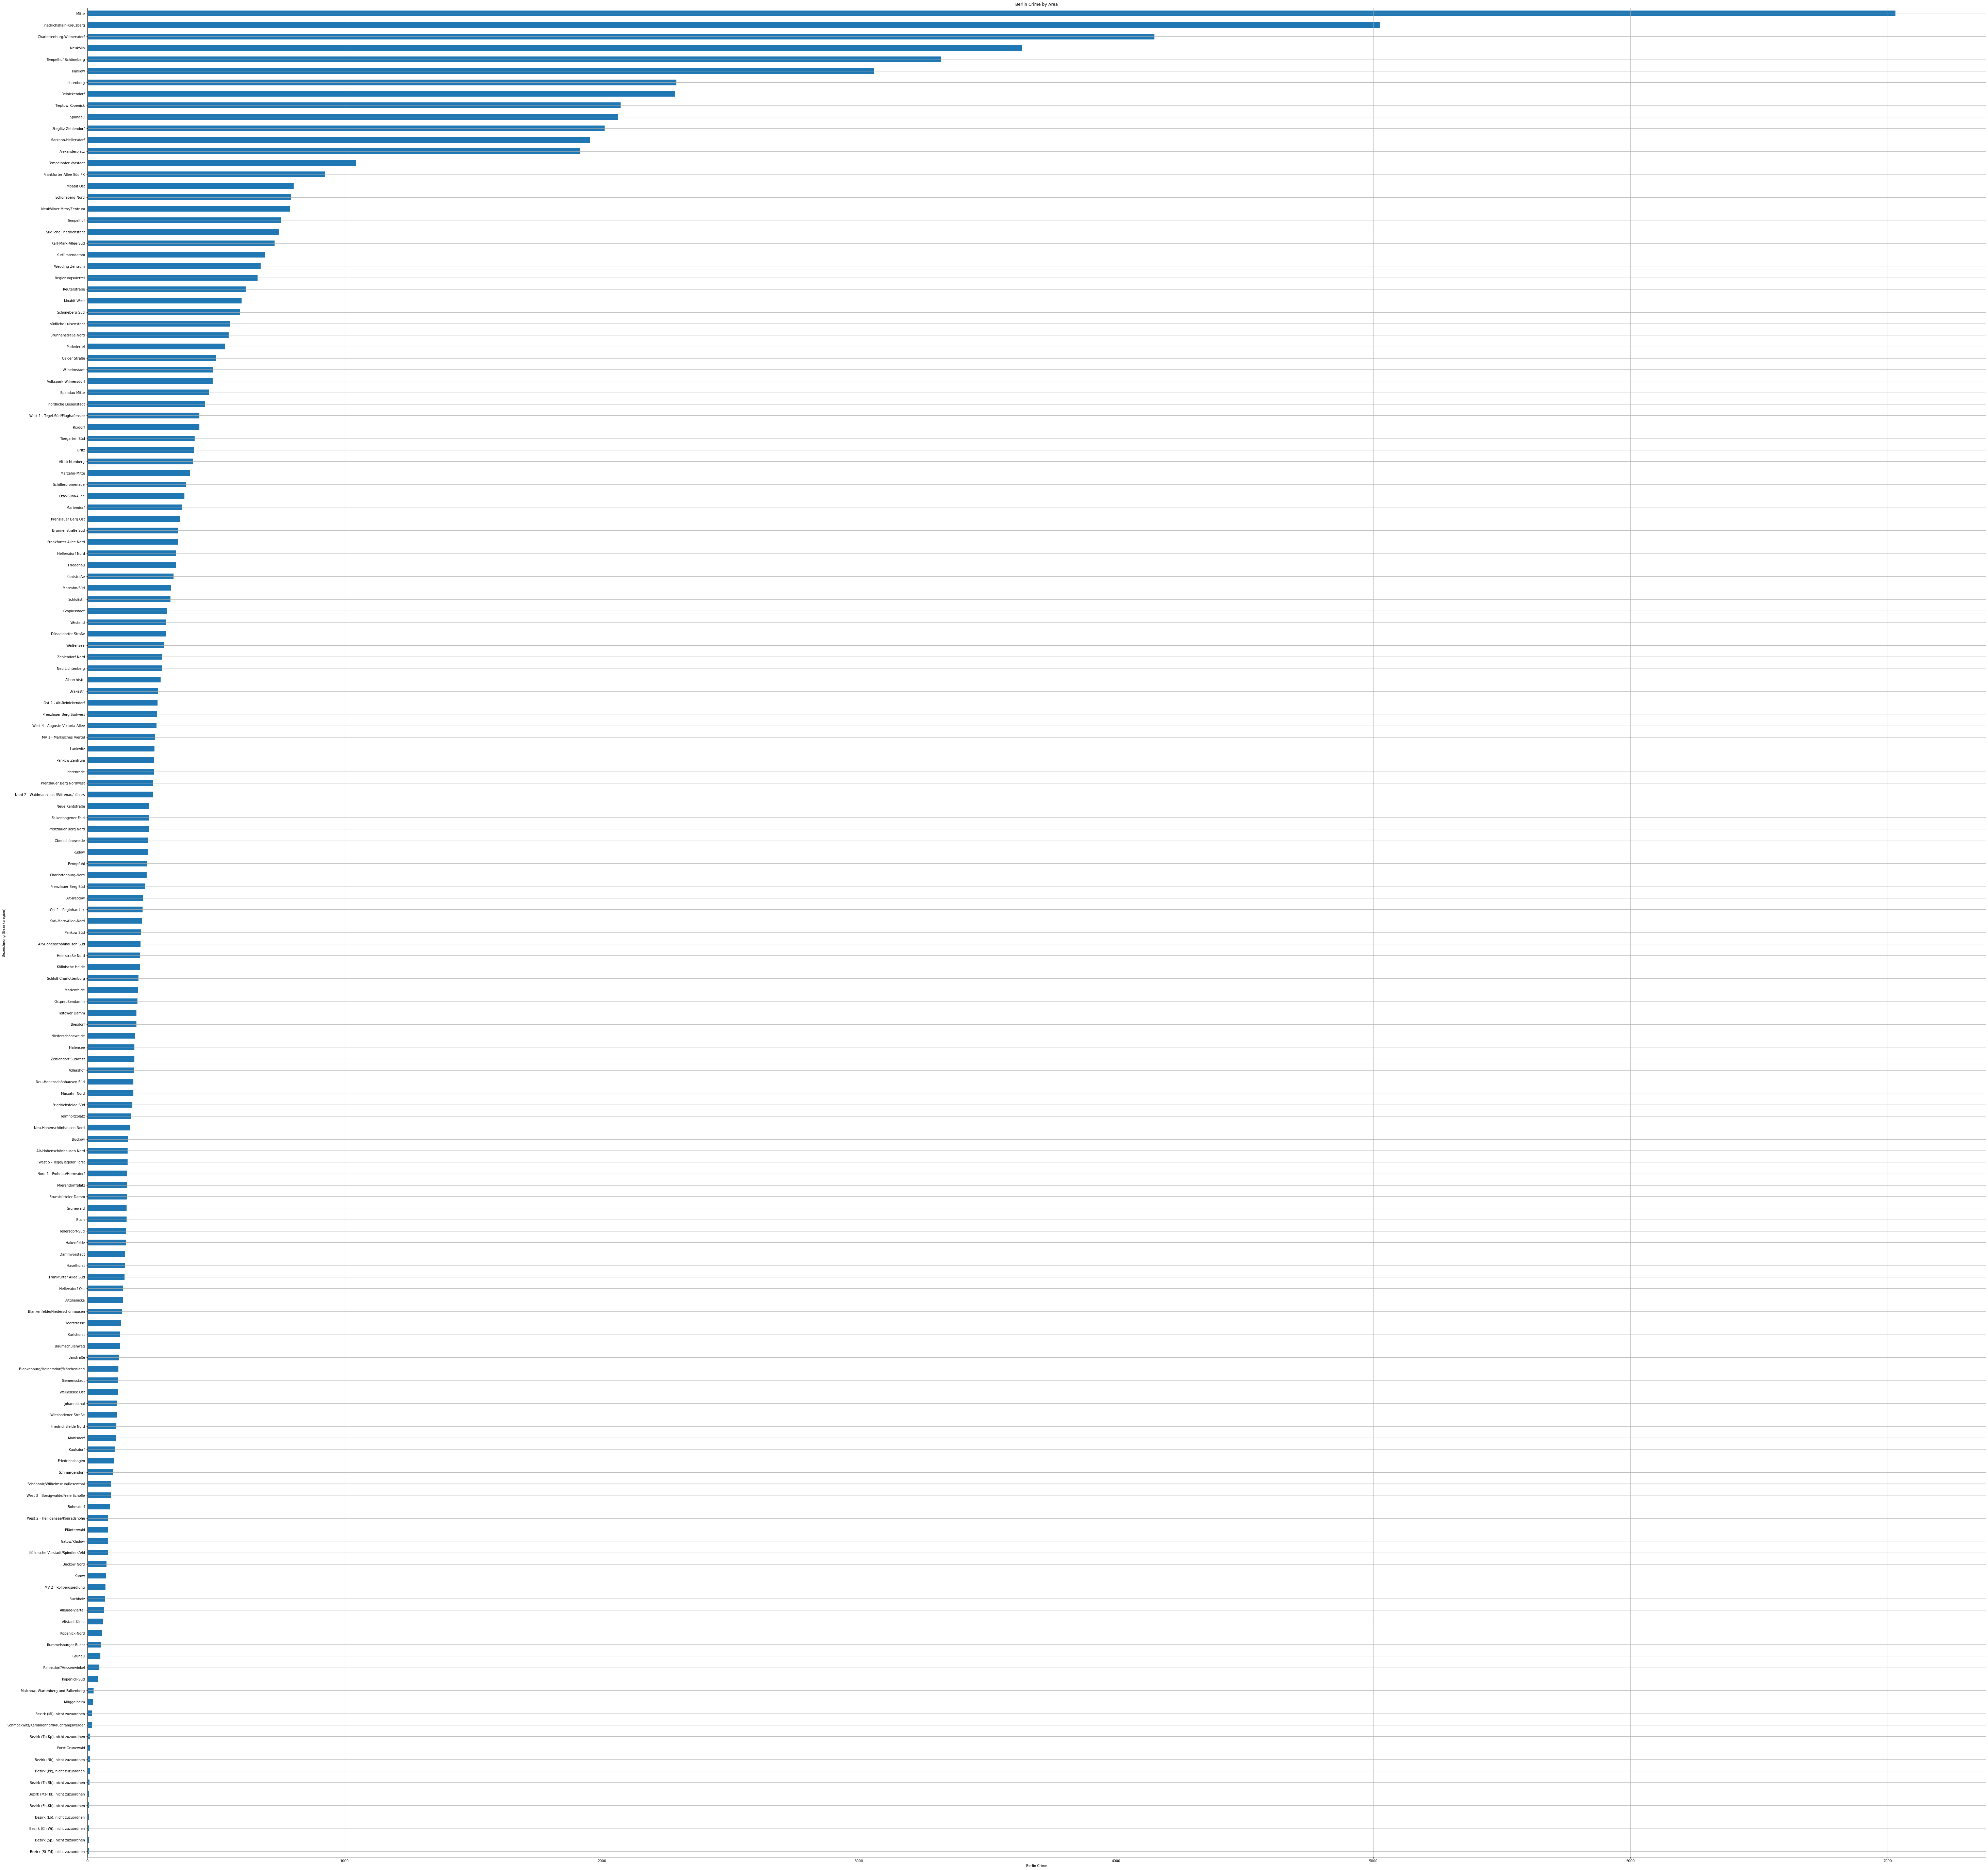

In [716]:
df_data_3.set_index('Bezeichnung (Bezirksregion)')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(100,100))
plt.xlabel('Berlin Crime')
plt.title('Berlin Crime by Area')
plt.show()

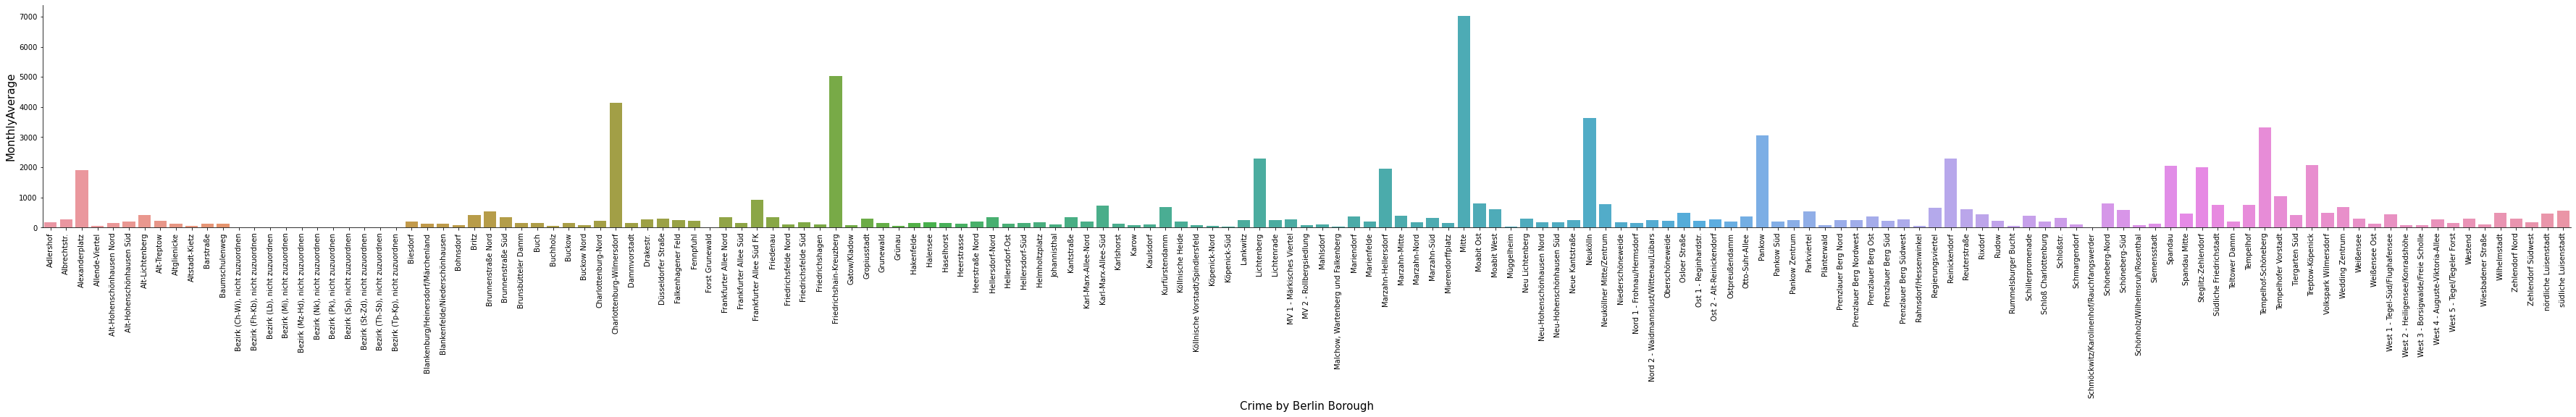

In [717]:
import seaborn as sns
df_data_3 = sns.catplot(data = df_data_3, x='Bezeichnung (Bezirksregion)', y='MonthlyAverage', kind='bar', aspect=10)
plt.xlabel('Crime by Berlin Borough', fontsize=15)
plt.ylabel('MonthlyAverage', fontsize=15)
df_data_3.set_xticklabels(rotation=90)


# Explore Berlin Borough Population data from Wikipedia

In [102]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

!pip install folium
import folium

print('Folium installed and imported!')


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Folium installed and imported!


In [103]:
source = requests.get("https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins").text
soup = BeautifulSoup(source, 'lxml')

table = soup.find("table")
table_rows = table.tbody.find_all("tr")

res = []
for tr in table_rows:
    td = tr.find_all("td")
    row = [tr.text for tr in td]
    
    # Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    if row != [] and row[1] != "Not assigned\n":
        # If a cell has a borough but a "Not assigned" neighborhood, then the neighborhood will be the same as the borough.
        if "Not assigned\n" in row[2]: 
            row[2] = row[1]
        res.append(row)

# Dataframe with 8 columns
df = pd.DataFrame(res, columns = ["NR","Bezirk", "Ortsteile","Fläche in km²","Einwohner","Einwohner pro km²", "Bezirksbürgermeister", "Karte"])
df.head()
           

,NR,Bezirk,Ortsteile,Fläche in km²,Einwohner,Einwohner pro km²,Bezirksbürgermeister,Karte
0,1\n,Mitte Mitte\n,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,"039,47\n",385.748\n,09.773\n,Stephan von Dassel (Grüne)\n,Lage52.51666666666713.366666666667\n
1,2\n,Friedrichshain-Kreuzberg Friedrichshain-Kreuzb...,0201 Friedrichshain0202 Kreuzberg\n,"020,16\n",290.386\n,14.404\n,Monika Herrmann (Grüne)\n,Lage52.513.433333333333\n
2,3\n,Pankow Pankow\n,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,"103,01\n",409.335\n,03.974\n,Sören Benn (Die Linke)\n,Lage52.56888888888913.402222222222\n
3,4\n,Charlottenburg-Wilmersdorf Charlottenburg-Wilm...,0401 Charlottenburg0402 Wilmersdorf0403 Schmar...,"064,72\n",343.592\n,05.309\n,Reinhard Naumann (SPD)\n,Lage52.49888888888913.285\n
4,5\n,Spandau Spandau\n,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,"091,91\n",245.197\n,02.668\n,Helmut Kleebank (SPD)\n,Lage52.53333333333313.166666666667\n


In [131]:
Bezirk = []
Ortsteile = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Bezirk.append(cells[0].text.rstrip('\abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ\n',))
        Ortsteile.append(cells[0].text.rstrip('\abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ\n'))
        

In [132]:
df['Bezirk'].unique()

array(['Treptow-Köpenick\xa0Treptow-Köpenick\n', 'Spandau\xa0Spandau\n',
       'Reinickendorf\xa0Reinickendorf\n',
       'Steglitz-Zehlendorf\xa0Steglitz-Zehlendorf\n',
       'Pankow\xa0Pankow\n',
       'Marzahn-Hellersdorf\xa0Marzahn-Hellersdorf\n',
       'Charlottenburg-Wilmersdorf\xa0Charlottenburg-Wilmersdorf\n',
       'Lichtenberg\xa0Lichtenberg\n',
       'Tempelhof-Schöneberg\xa0Tempelhof-Schöneberg\n',
       'Neukölln\xa0Neukölln\n', 'Mitte\xa0Mitte\n',
       'Friedrichshain-Kreuzberg\xa0Friedrichshain-Kreuzberg\n'],
      dtype=object)

In [133]:
df = df.groupby(['Einwohner pro km²'], as_index=False).sum()
    
df.head()

,Einwohner pro km²,NR,Bezirk,Bezirke,Fläche in km²,Einwohner,Bezirksbürgermeister,Karte
0,01.625\n,9\n,Treptow-Köpenick Treptow-Köpenick\n,0901 Alt-Treptow0902 Plänterwald0903 Baumschul...,"168,42\n",273.689\n,Oliver Igel (SPD)\n,Lage52.4513.566666666667\n
1,02.668\n,5\n,Spandau Spandau\n,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,"091,91\n",245.197\n,Helmut Kleebank (SPD)\n,Lage52.53333333333313.166666666667\n
2,02.978\n,12\n,Reinickendorf Reinickendorf\n,1201 Reinickendorf1202 Tegel1203 Konradshöhe12...,"089,46\n",266.408\n,Frank Balzer (CDU)\n,Lage52.56666666666713.35\n
3,03.025\n,6\n,Steglitz-Zehlendorf Steglitz-Zehlendorf\n,0601 Steglitz0602 Lichterfelde0603 Lankwitz060...,"102,50\n",310.071\n,Cerstin Richter-Kotowski (CDU)\n,Lage52.43333333333313.25\n
4,03.974\n,3\n,Pankow Pankow\n,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,"103,01\n",409.335\n,Sören Benn (Die Linke)\n,Lage52.56888888888913.402222222222\n


In [134]:
 #Explore most populated areas by km² in Berlin
df.sort_values(by='Einwohner pro km²', ascending=False).head()

,Einwohner pro km²,NR,Bezirk,Bezirke,Fläche in km²,Einwohner,Bezirksbürgermeister,Karte
11,14.404\n,2\n,Friedrichshain-Kreuzberg Friedrichshain-Kreuzb...,0201 Friedrichshain0202 Kreuzberg\n,"020,16\n",290.386\n,Monika Herrmann (Grüne)\n,Lage52.513.433333333333\n
10,09.773\n,1\n,Mitte Mitte\n,0101 Mitte0102 Moabit0103 Hansaviertel0104 Tie...,"039,47\n",385.748\n,Stephan von Dassel (Grüne)\n,Lage52.51666666666713.366666666667\n
9,07.343\n,8\n,Neukölln Neukölln\n,0801 Neukölln0802 Britz0803 Buckow0804 Rudow08...,"044,93\n",329.917\n,Martin Hikel (SPD)\n,Lage52.48333333333313.45\n
8,06.611\n,7\n,Tempelhof-Schöneberg Tempelhof-Schöneberg\n,0701 Schöneberg0702 Friedenau0703 Tempelhof070...,"053,09\n",350.984\n,Angelika Schöttler (SPD)\n,Lage52.46666666666713.383333333333\n
7,05.626\n,11\n,Lichtenberg Lichtenberg\n,1101 Friedrichsfelde1102 Karlshorst1103 Lichte...,"052,29\n",294.201\n,Michael Grunst (Die Linke)\n,Lage52.53333333333313.5\n


In [135]:
df.rename(columns={df.columns[2]:'Bezirke'}, inplace=True)
df.head()

,Einwohner pro km²,NR,Bezirke,Bezirke,Fläche in km²,Einwohner,Bezirksbürgermeister,Karte
0,01.625\n,9\n,Treptow-Köpenick Treptow-Köpenick\n,0901 Alt-Treptow0902 Plänterwald0903 Baumschul...,"168,42\n",273.689\n,Oliver Igel (SPD)\n,Lage52.4513.566666666667\n
1,02.668\n,5\n,Spandau Spandau\n,0501 Spandau0502 Haselhorst0503 Siemensstadt05...,"091,91\n",245.197\n,Helmut Kleebank (SPD)\n,Lage52.53333333333313.166666666667\n
2,02.978\n,12\n,Reinickendorf Reinickendorf\n,1201 Reinickendorf1202 Tegel1203 Konradshöhe12...,"089,46\n",266.408\n,Frank Balzer (CDU)\n,Lage52.56666666666713.35\n
3,03.025\n,6\n,Steglitz-Zehlendorf Steglitz-Zehlendorf\n,0601 Steglitz0602 Lichterfelde0603 Lankwitz060...,"102,50\n",310.071\n,Cerstin Richter-Kotowski (CDU)\n,Lage52.43333333333313.25\n
4,03.974\n,3\n,Pankow Pankow\n,0301 Prenzlauer Berg0302 Weißensee0303 Blanken...,"103,01\n",409.335\n,Sören Benn (Die Linke)\n,Lage52.56888888888913.402222222222\n


In [136]:
df_data_3.rename(columns={df_data_3.columns[0]:'Bezirke'}, inplace=True)
df_data_3.head()

,Bezirke,Bezirke,MonthlyAverage,Raub,"Straßenraub,\nHandtaschen-raub",Körper-verletzungen \n-insgesamt-,Gefährl. und schwere Körper-verletzung,"Freiheits-beraubung, Nötigung,\nBedrohung, Nachstellung",Diebstahl \n-insgesamt-,Diebstahl von Kraftwagen,Diebstahl \nan/aus Kfz,Fahrrad-\ndiebstahl,Wohnraum-\neinbruch,Branddelikte \n-insgesamt-,Brand-\nstiftung,Sach-beschädigung -insgesamt-,Sach-beschädigung durch Graffiti,Rauschgift-delikte,Kieztaten
0,Adlershof,90207,180.583333,14,9,171,36,78,983,48,140,240,23,9,6,240,52,28,396
1,Albrechtstr.,60102,284.833333,35,23,274,49,128,1486,79,308,271,142,31,12,426,90,59,843
2,Alexanderplatz,10113,1914.500000,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,Allende-Viertel,90414,64.000000,1,0,75,17,20,355,20,53,87,5,8,5,94,15,18,172
4,Alt-Hohenschönhausen Nord,110204,156.916667,17,9,197,41,64,891,35,136,62,35,7,6,173,13,26,469


# Explore Berlin Areas with Folium Map

In [156]:

address = "Berlin, Germany, ON"

geolocator = Nominatim(user_agent="Berlin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin city are {}, {}.'.format(latitude, longitude))



# create map of London using latitude and longitude values
map_Berlin = folium.Map(location=[latitude, longitude], zoom_start=10)
map_Berlin


The geograpical coordinate of Berlin city are 52.515292, 13.378167057944445.


# Use the foursquare API to get police station location data information in Berlin, Germany

In [157]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [159]:
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.5170365 13.3888599


In [160]:
search_query = 'Polizei'
radius = 10000
print(search_query + ' .... OK!')

Polizei .... OK!


In [161]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=5D3C0R25ZAFJLEAZDAAZ1SCF4OIUMCMIR05DKQLGWM0SW15R&client_secret=HZVHYDCT13H5NCZ4HVDEC2CZKOHMUPAH2GAJ41NTVA3ENK1F&ll=52.5170365,13.3888599&oauth_token=QLZFB0CWD2UNADLXDUIS5SK23CUIY11SBHWELQJ0LZXEOFDP&v=20180604&query=Polizei&radius=10000&limit=30'

In [162]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60241b1f95b5c75499e1f850'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e14de40d164535f06168e09',
    'name': 'Polizei Abschnitt 33',
    'location': {'address': 'Perleberger Str. 61A',
     'lat': 52.53386480694763,
     'lng': 13.353252939387392,
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.53386480694763,
       'lng': 13.353252939387392}],
     'distance': 3053,
     'postalCode': '10559',
     'cc': 'DE',
     'city': 'Berlin',
     'state': 'Berlin',
     'country': 'Deutschland',
     'formattedAddress': ['Perleberger Str. 61A',
      '10559 Berlin',
      'Deutschland']},
    'categories': [{'id': '4bf58dd8d48988d12e941735',
      'name': 'Police Station',
      'pluralName': 'Police Stations',
      'shortName': 'Police Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_policestation_',
       'suffix': '.png'},
 

In [163]:
import requests
import json
from datetime import datetime
import pandas as pd
import re
from pandas import json_normalize

In [164]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe2 = json_normalize(venues)
dataframe2.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood
0,4e14de40d164535f06168e09,Polizei Abschnitt 33,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978975,False,Perleberger Str. 61A,52.533865,13.353253,"[{'label': 'display', 'lat': 52.53386480694763...",3053,10559,DE,Berlin,Berlin,Deutschland,"[Perleberger Str. 61A, 10559 Berlin, Deutschland]",NaN,NaN
1,4be112870365c9b66fe2b238,Polizei Abschnitt 13,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978975,False,Hadlichstr. 37-41,52.569650,13.415130,"[{'label': 'display', 'lat': 52.56964975511158...",6120,13187,DE,Berlin,Berlin,Deutschland,"[Hadlichstr. 37-41, 13187 Berlin, Deutschland]",NaN,NaN
2,4e7b0bbcfa76e8ee773f282b,"Polizei BGSt 212, Kfz-Sicherstellung","[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978975,False,Belziger Str. 52,52.485658,13.348148,"[{'label': 'display', 'lat': 52.48565775087338...",4451,10823,DE,Berlin,Berlin,Deutschland,"[Belziger Str. 52, 10823 Berlin, Deutschland]",NaN,NaN
3,53622cbd498ef3775e628f9b,Polizei Abschnitt 64,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978975,False,Nöldnerstr. 35,52.502077,13.484323,"[{'label': 'display', 'lat': 52.50207700898370...",6678,10317,DE,Berlin,Berlin,Deutschland,"[Nöldnerstr. 35, 10317 Berlin, Deutschland]",NaN,NaN
4,4d1244d9ffa1224b9f0398ad,Polizei Abschnitt 32,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",v-1612978975,False,Keibelstr. 35,52.524533,13.415439,"[{'label': 'display', 'lat': 52.52453323208640...",1984,10178,DE,Berlin,Berlin,Deutschland,"[Keibelstr. 35, 10178 Berlin, Deutschland]",NaN,NaN


In [165]:
dataframe2_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

for lat, lng, id, categories in zip(
        dataframe2['location.lat'], 
        dataframe2['location.lng'], 
        dataframe2['id'],
        dataframe2['categories']):
    label = '{}, {}'.format(id,categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(dataframe2_map)  
# display map
dataframe2_map